In [1]:
import astropy.coordinates as coord
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# gala
import gala.coordinates as gc
import gala.dynamics as gd
import gala.potential as gp
from gala.units import galactic

In [2]:
galcen_frame = coord.Galactocentric()

In [24]:
sun_w0 = gd.PhaseSpacePosition(
    pos=[-8.2, 0, 0.02] * u.kpc,
    vel=galcen_frame.galcen_v_sun
)

In [21]:
w0s = []

for rv in np.linspace(-100, 100, 8):
    c = coord.SkyCoord(
        ra="17:51:40.2082",
        dec="-29:53:26.502",
        unit=(u.hourangle, u.degree),
        distance=1.58*u.kpc,
        pm_ra_cosdec=-4.36*u.mas/u.yr,
        pm_dec=3.06*u.mas/u.yr,
        radial_velocity=rv*u.km/u.s
    )

    w0 = gd.PhaseSpacePosition(c.transform_to(galcen_frame).data)
    w0s.append(w0)
    
w0s = gd.combine(w0s)

In [22]:
c.galactic

<SkyCoord (Galactic): (l, b, distance) in (deg, deg, kpc)
    (359.86128637, -1.62104054, 1.58)
 (pm_l_cosb, pm_b, radial_velocity) in (mas / yr, mas / yr, km / s)
    (0.40921369, 5.31090804, 100.)>

In [28]:
(c.galactic.pm_l_cosb * c.distance).to(u.km/u.s, u.dimensionless_angles())

<Quantity 3.06498733 km / s>

(-1.0, 1.0)

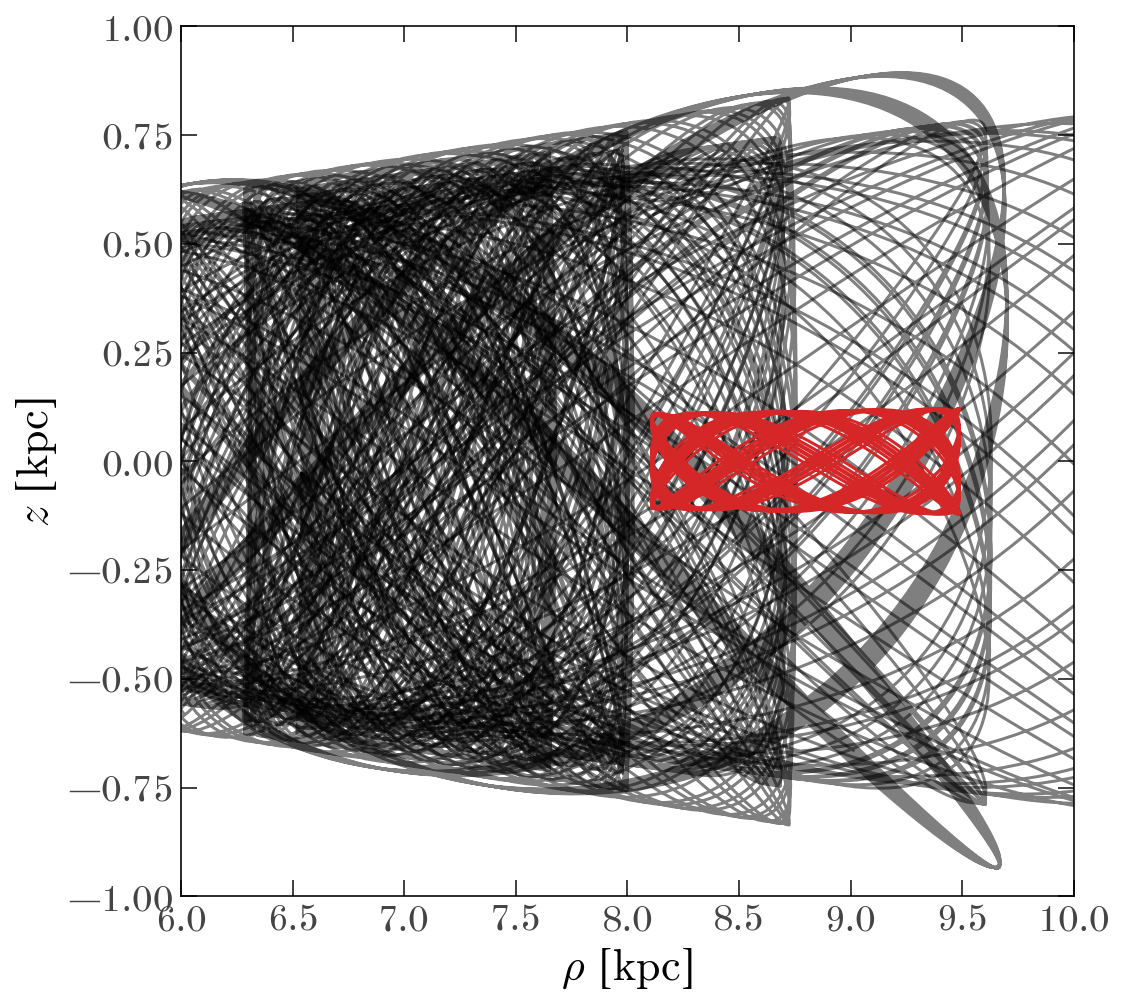

In [27]:
pot = gp.MilkyWayPotential()
orbits = pot.integrate_orbit(w0s, dt=-1, t1=0, t2=-4*u.Gyr)
sun_orbit = pot.integrate_orbit(sun_w0, t=orbits.t)

fig, ax = plt.subplots(figsize=(8, 8))
_ = orbits.cylindrical.plot(['rho', 'z'], axes=[ax], color='k', alpha=0.5)
_ = sun_orbit.cylindrical.plot(['rho', 'z'], axes=[ax], color='tab:red')
ax.set_xlim(6, 10)
ax.set_ylim(-1, 1)